# *Ab* *initio* molecular dynamics of the vibrational motion of HF

### Part 1:  Analysis of an *ab* *initio* potential energy surfaces (PES)
We are going to use what is often referred to as an *ab* *initio* potential energy surface of the diatomic
molecule hydrogen fluoride.  This potential energy surface accounts repulsion between all electrons in the molecule, and the attraction between electrons and protons in the molecule, at different separations between the H and F atoms according as dictated by quantum mechanical *theories*.  This is in fact quite different from *model* potentials (e.g. the Lennard-Jones potential and the Harmonic Potential) we studied in class.  The calculations based on quantum mechanical theories have already been performed for you, and we will just use the results; we will learn more about these theories in Physical Chemistry II.  We will, however, make a comparison between the more accurate *theoretical* results and a model potential in this lab.

We will start by importing a few useful libraries - these are packages of python code that provide capabilities to do numerical calculations, plot data, etc.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
import pandas as pd

Let's also demonstrate just a few basic programming concepts in python here!

Let's start by plotting the experimental IR spectrum of water that we took a few weeks ago.
That data is in a file called *spectra.CSV*.  We are going to use a python library 
called `pandas` to read it, then we will plot the data with a library called `pyplot`.

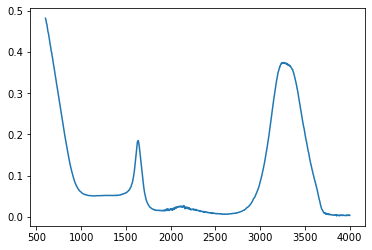

In [2]:
# read spectrum from data file!
ir_spectrum = pd.read_csv("spectra.CSV", header=None)
# create empty array for list of wavenumbers (in inverse cm)
wn = []
# create empty array for absorbance values
ab = []
for i in range(0,len(ir_spectrum)):
    wn.append(ir_spectrum.iloc[i,0])
    ab.append(ir_spectrum.iloc[i,1])
    
plt.plot(wn, ab)
    


The values above came from quantum chemistry calculations, specifically Hartree-Fock theory.  
In principle, we could compute these **from** a Jupyter notebook with a special quantum chemistry 
package called *psi4* installed... however, the installation has been vexing for Windows so we do not.  

The relevant code blocks to use *psi4* to compute these surfaces follows for those interested.  After executing the next two blocks of code, the Hartree-Fock energy as a function of bond-length would be stored in the list *RHF_E_array*.

In [3]:
### import psi4 package
import psi4

In [9]:
r_array = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3]
### template for the z-matrix
mol_tmpl = """H
F 1 **R**"""

### array for different instances of the HF molecule
molecules =[]
### array for the different RHF energies for different HF bond-lengths
RHF_E_array = []

### loop over the different bond-lengths, create different instances
### of HF molecule
for r in r_array:
    molecule = psi4.geometry(mol_tmpl.replace("**R**", str(r)))
    molecules.append(molecule)
    
### loop over instances of molecules, compute the RHF, MP2, and CCSD
### energies and store them in their respective arrays
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVDZ", molecule=mol)
    RHF_E_array.append(energy)
    


We can use matplotlib to plot the energies in 'E_array' against the bondlengths in 'r_array':

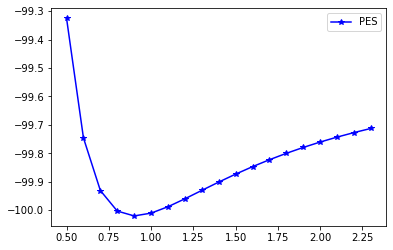

In [10]:
plt.plot(r_array, RHF_E_array, '-b*', label='PES')
plt.legend()
plt.show()

Now that you have the raw data, we will interpolate this data using cubic splines.  This will permit us to 
estimate the potential energy at any arbitrary separation between 0.5 and 2.3 Angstroms.

The general syntax for creating a cubic spline object is as follows:

`spline = InterpolatedUnivariateSpline(x-data, y-data, k=3)`

#### Note on units
The energies we used above are in a unit called Hartrees, which are the atomic unit of energy.  We have so far been specifying our separation in Angstroms (**not the atomic unit of length**) so we are in a mixed unit system.  When we generate our spline, we will use an array of bond lengths in atomic units as the x-data and the energies in atomic units as the y-data, which will yield a PES purely in atomic units.  Therefore, the first thing we will do before creating the spline is to create an array of bond lengths in atomic units (~1.89 * bond lengths in Angstroms is the bond length in atomic units); we will create a cubic spline (called E_spline) that hold the PES data in atomic units.

In [ ]:
''' Create array of bond lengths in atomic units called r_array_au and fit PES to splines in this cell! '''

''' create a cubic spline for the energies vs bond length in atomic units here! '''


Now we can plot the splines against the PES data to make sure our splines were generated properly.

In [ ]:
### form a much finer grid to evaluate spline object at
r_fine = np.linspace(0.5*1.89,2.3*1.89,200)
### compute the interpolated/extrapolated values for Energy on this grid
E_fine = E_spline(r_fine)


### plot the interpolated data with lines against computed data in *'s
plt.plot(r_fine, E_fine, 'red', label='Fit')
plt.plot(r_array_au, E_array, 'b*', label='Computed')
plt.legend()
plt.show()


### Part 2:  Computation of Forces and related quantities and their importance in Newton's law
We can derive a number of important quantities just from the potential energy surfaces we have computed.  For example, we estimate the equilibrium bond length by finding the separation at which the potential is minimum; note this would also be the position that the force goes to zero:
\begin{equation}
\frac{d}{dr} V(r_{eq}) = -F(r_{eq}) = 0.
\end{equation}

The force as a function of separation plays a significant role in the vibrational motion of the molecule, as we will see shortly.  

To compute the force, we can use the fact
that the spline objects (which we previously created) can be directly differentiated using the following syntax:

`spline_derivative = spline.derivative()`

Once computed, plot each spline against the r_fine array previously created!
#### Question 1: What unit system do you think the forces are in?

In [ ]:
''' Differentiate splines and plot resulting forces in this cell! '''


### define new array called "Force_fine"

### plot!
plt.plot(r_fine, Force_fine, 'blue', label='Force')
plt.legend()
plt.show()


#### Equilibrium bond length 
Next we will find where the minimum of the potential energy surfaces are and use that
to find the equilibrium bond length, making use of numpy's argmin function to find the
index corresponding to the minimum value in a numpy array:

In [ ]:
### Find Equilibrium Bond-Lengths for each level of theory
Req_idx = np.argmin(E_fine)

### find the value of the separation corresponding to that index
Req = r_fine[Req_idx]

### print equilibrium bond-lengths at each level of theory!
print(" Equilibrium bond lengt is ",Req, "atomic units")
print(" Req is ",Req/1.89, "Angstroms")

### mass of hydrogen in atomic units
mH = 1836.
### mass of fluorine in atomic units
mF = 34883.

''' compute reduced mass and store it to variable mu here! '''

### Print the reduced mass!
print("Reduced mass is ",mu, "atomic units")

##### Question 2: How does the computed equilibrium bond length compare to the experimentally-determined (i.e. the "true" bond length) of HF.  You probably don't know the experimental bond length of HF off the top of your head, so look it up!

#### Harmonic Frequency 
You might have learned that the Harmonic Oscillator potential, which is a reasonable model for the vibrational motion of diatomic molecules near their equilibrium bond length, is given by
\begin{equation}
V(r) = \frac{1}{2} k (r-r_{eq})^2 + V_0
\end{equation}
and that the vibrational frequency of the molecule within the Harmonic oscillator model is given by
\begin{equation}
\nu = \frac{1}{2\pi}\sqrt{\frac{k}{\mu}}
\end{equation}
where $\mu$ is the reduced mass of the molecule and $k$ is known as the force constant.  
We can estimate the force constant as
\begin{equation}
k = \frac{d^2}{dr^2} V(r_{eq}),
\end{equation}
and the reduced mass of HF is defined as
\begin{equation}
\mu = \frac{m_H \cdot m_F}{m_H + m_F},
\end{equation}
where $m_H$ and $m_F$ are the masses of Hydrogen and Fluoride, respectively.

Let's go ahead and get the force constant, print the value, 
and estimate the potential energy within the Harmonic approximation!  Just like we were able to differentiate our PES splines to get a force spline, we can differentiate a force spline to get a curvature spline (which we can call Curvature_spline); the force constant will then be the curvature evaluated at the equlibrium bond length.


In [ ]:
''' Differentiate force splines to get curvatures and determine force constants in this cell!'''


''' Get force constant by evaluating Curvature_spline at Req and store it
    to the variable Force_Constant '''

### Print the Force Constant
print("Force Constant is ",Force_Constant)

''' Compute the vibrational frequency and store it to the variable nu '''

### Print the frequency!
print("Frequency is ",nu)

### This is the vibrational energy in atomic units in terms of the frequency
E_vib_au = 2 * np.pi * nu
print("Vibrational Energy at Level is ",E_vib_au, "atomic units")



The vibrational energy in atomic units can be converted to more familiar 
spectroscopic units to allow comparision to the experimental vibrational frequency 
of HF. 

#### Question 3:  Compute the vibrational frequency in $cm^{-1}$
This [link](http://halas.rice.edu/conversions) has a very useful unit converter from energy to spectroscopic units like wavenumbers ($cm^{-1}$) or nanometers ($nm$).  It might be useful first to convert your vibrational energy in atomic units to electron volts by using the fact that 1 atomic unit of energy is equal to 27.211 electron volts.

Now that we have the force constants, let's define an array for the harmonic potential (Harm_Pot) that store the harmonic potentials at each level of theory evaluated at the different bond lengths (in atomic units) stored in the array r_fine; recall the definition of the Harmonic potential is 
\begin{equation}
V(r) = \frac{1}{2} k (r-r_{eq})^2 + V_0,
\end{equation}
where we can use $E(r_{eq})$ as $V_0$.

In [ ]:
''' Create arrays of Harmonic potentials in this cell! '''


Let's plot the resulting Harmonic potential against the *ab* *initio* potential near the equilibrium geometry

In [ ]:
### plot RHF harmonic potential vs RHF ab initio potential!
plt.plot(r_fine, Harm_Pot, 'red', label='Harmonic')
plt.plot(r_fine, E_fine, 'b--', label='ab initio' )
### these limits were chosen to zoom in on region of the RHF PES that is approximately
### harmonic
plt.xlim(1.0, (1.69+0.69))
plt.ylim(-100.4,-99.7)
plt.legend()
plt.show()

#### Question 4:  Do you think the CO molecule will have a higher or lower vibrational frequency? 
Justify your answer in a few sentences **and** run the computation using psi4 to verify!

Can we perform the same analysis for the water molecule?  Yes, but it will be harder to displace along the relevant $3N - 6$ internal cordinates that define the vibrations.  Instead, we can have `psi4` do the work for us!

In [14]:
mol = psi4.geometry("""
0 1
O
H 1 1.1
H 1 1.1 2 104
symmetry c1
""")

psi4.set_options({'basis':        'cc-pVDZ'})
scf_e, scf_wfn = psi4.energy('mp2', return_wfn=True)

e, wfn = psi4.optimize('mp2', return_wfn=True)
#e, normal_modes = psi4.frequencies('scf')
e, wfn = psi4.frequencies('mp2', ref_gradient=wfn.gradient(), return_wfn=True)
print(wfn.frequencies().get(0,0))

Optimizer: Optimization complete!
 7 displacements needed.
 1 2 3 4 5 6 7
1678.997094787619


In [15]:
print(wfn.frequencies().get(0,1))
print(wfn.frequencies().get(0,2))

3856.993944435262
3976.861328096157


In [ ]:
print(omega)

#### Question 5: How do these frequencies compare to the experimental spectra?